In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
import math
import statsmodels.formula.api as sm
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events)
- Look at some examples

In [4]:
data = pd.read_csv('train.tsv', sep='\t', na_values={'is_news' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [5]:
data[['title', 'label']].head()

,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


#### Does being a news site effect green-ness?

In [6]:
model = sm.logit(
    "label ~ is_news",
    data = data
).fit()

model.summary()

#no it doesnt--none of the p values are significant

Optimization terminated successfully.
         Current function value: 0.692751
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Apr 2017   Pseudo R-squ.:               5.980e-05
Time:                        17:58:03   Log-Likelihood:                -5122.9
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.4337
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0303      0.038      0.806      0.420        -0.043     0.104
is_news        0.0374      0.048      0.783      0.434        -0.056     0.131
==============================================================================
"""

#### Does the website category effect green-ness?

In [7]:
model = sm.logit(
    "label ~ alchemy_category",
    data = data
).fit()

model.summary()


# some of them do: arts & entertainment, business, computer & internet, gaming, health, recreation, sports
# each of these has a statistically significant p value

         Current function value: 0.649452
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7381
Method:                           MLE   Df Model:                           13
Date:                Sun, 02 Apr 2017   Pseudo R-squ.:                 0.06256
Time:                        18:02:45   Log-Likelihood:                -4802.7
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                1.372e-128
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0085      0.041      0.207      0.836        -0.072     0.090
alchemy_category[T.arts_entertainment]    -0.5324      0.079     -6.731      0.000        -0.687    -0.377
alchemy_category[T.business]               0.8935      0.085     10.499      0.000         0.727     1.060
alchemy_category[T.computer_internet]     -1.1253      0.141     -7.979      0.000        -1.402    -0.849
alchemy_category[T.culture_politics]      -0.1780      0.116     -1.535      0.125        -0.405     0.049
alchemy_category[T.gaming]                -0.5475      0.241     -2.269      0.023        -1.021    -0.074
alchemy_category[T.health]                 0.2861      0.099      2.892      0.004         0.092     0.480
alchemy_category[T.law_crime]             -0.3340      0.366     -0.912      0.362        -1.052     0.384
alchemy_category[T.recreation]             0.7650      0.074     10.340      0.000         0.620     0.910
alchemy_category[T.religion]              -0.3450      0.243     -1.422      0.155        -0.820     0.130
alchemy_category[T.science_technology]    -0.1820      0.125     -1.455      0.146        -0.427     0.063
alchemy_category[T.sports]                -1.3623      0.134    -10.199      0.000        -1.624    -1.100
alchemy_category[T.unknown]               -0.7017      0.867     -0.809      0.418        -2.401     0.998
alchemy_category[T.weather]              -18.1423   4331.844     -0.004      0.997     -8508.400  8472.115
==========================================================================================================
"""

#### Does the image ratio effect green-ness?

In [7]:
model = sm.logit(
    "label ~ image_ratio",
    data = data
).fit()

model.summary()

# image ratio does NOT affect greenness

Optimization terminated successfully.
         Current function value: 0.692631
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Mar 2017   Pseudo R-squ.:               0.0002325
Time:                        09:25:01   Log-Likelihood:                -5122.0
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                    0.1228
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0590      0.024      2.499      0.012         0.013     0.105
image_ratio    -0.0210      0.015     -1.400      0.161        -0.051     0.008
===============================================================================
"""

In [8]:
image_ratio_coef = -0.0210
math.exp(image_ratio_coef)

0.9792189645694596

#### Fit a logistic regression model using statsmodels
- Test different features that may be valuable
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [9]:

model = sm.logit(
    "label ~ commonlinkratio_4",
    data = data
).fit()

model.summary()


# spelling_errors_ratio coef = -1.5567
# math.exp(-1.5567)
# 0.210830665686284

#commonlinkratio_4 = 2.3149
#frameTagRatio = -10.1350

Optimization terminated successfully.
         Current function value: 0.689479
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Mar 2017   Pseudo R-squ.:                0.004783
Time:                        09:25:11   Log-Likelihood:                -5098.7
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 2.549e-12
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0593      0.028     -2.089      0.037        -0.115    -0.004
commonlinkratio_4     2.3149      0.339      6.820      0.000         1.650     2.980
=====================================================================================
"""

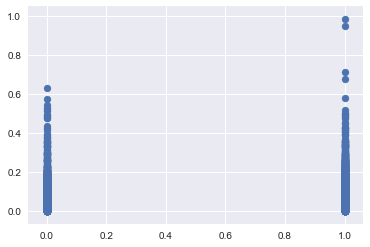

In [27]:
# TODO

plt.scatter(data.label, data.commonlinkratio_4)

# data[['label','frameTagRatio']]


#### Fit a logistic regression model using statsmodels with text features
- Add text features that may be useful, add this to the model and see if they improve the fit
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [11]:
# EXAMPLE text feature 'recipe'
data['is_recipe'] = data['title'].fillna('').str.contains('recipe')
data['is_review'] = data['title'].fillna('').str.contains('review')
data['is_howto'] = data['title'].fillna('').str.contains('how to')

In [13]:
model = sm.logit(
    "label ~ commonlinkratio_4 : is_recipe + commonlinkratio_4 : is_howto",
    data = data
).fit()            
### question: does it matter whether or not you choose 
model.summary()

Optimization terminated successfully.
         Current function value: 0.682638
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7391
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Mar 2017   Pseudo R-squ.:                 0.01466
Time:                        09:27:33   Log-Likelihood:                -5048.1
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 2.416e-32
======================================================================================================
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0866      0.029     -3.023      0.003        -0.143    -0.030
commonlinkratio_4:is_recipe[False]     2.0822      0.339      6.135      0.000         1.417     2.747
commonlinkratio_4:is_recipe[True]     36.8864      5.329      6.922      0.000        26.443    47.330
commonlinkratio_4:is_howto[T.True]     9.3171      4.252      2.191      0.028         0.983    17.651
======================================================================================================
"""